In [86]:
### subroutine to plot the model as a grid
import matplotlib.pyplot as plt

def plot_grid(name):
    plt.rcParams['figure.figsize'] = [3,3]  ## sets the size of the image

    fig, ax = plt.subplots()
    ax.imshow(name)

    # Set ticks and labels 
    ax.set_xticks(np.arange(0.5, n, 1))
    ax.set_yticks(np.arange(0.5, n, 1))
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    # add grid lines  
    ax.grid(color='black', linewidth=0.3)
    plt.show()
    return

In [87]:
## 
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as random
import math
##############################################################  setup
m = 100 #years
n= 3 ## number of grid points is n*n
recovery = 10 # time for destroyed land to recover

ocean=np.array([14/255,0/255,117/255])   
shallowocean =np.array([116/255,132/255,252/255])
glacier=np.array([191/255,232/255,255/255]) ## ice on land (glacier)
icefloat=np.array([0.9,0.9,1])  ## sea ice  
land=np.array([0/255,122/255,65/255]) 
lowland=np.array([255/255,210/255,150/255])
destroyedland=np.array([1,0,0]) # for later

geography={'ocean':ocean,'shallowocean':shallowocean,'glacier':glacier,'icefloat':icefloat,\
      'land':land,'lowland':lowland,'destroyedland':destroyedland}

######################################  initiaize model (geography)
background=[[land]*n]*n
grid_colours=background.copy()
clim_model=np.array(grid_colours)  ## initializes the model to all land
print(clim_model)

#clim_model[1,2]=shallowocean
#clim_model[2,0]=glacier
#clim_model[2,2]=lowland



######################################  initialize temperature

#init_temperature=np.array([[0]*n]*n)
#print("initial temperature anomaly:\n", init_temperature)

##### values from NOAA 
## https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series/globe/ocean/ytd/12/1850-2022
## uses average annual anomaly change from 1981-2022
land_temp_inc = 0.027 #average annual land temp increase 
ocean_temp_inc = 0.0093 #average annual ocean temp increase 




######################################  plot
#plot_grid(clim_model)


[[[0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]]

 [[0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]]

 [[0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]]]


In [88]:
### land temperature change over time 
### would like to make temp inc double after 100 years 
'''land_temp_over_time=[]
land_temp_over_time.append(init_temperature)
t = 100
land_temp = init_temperature
for i in range(t):
    land_temp = land_temp+[[land_temp_inc]*n]
    land_temp_over_time.append(land_temp)

land_temp'''

'land_temp_over_time=[]\nland_temp_over_time.append(init_temperature)\nt = 100\nland_temp = init_temperature\nfor i in range(t):\n    land_temp = land_temp+[[land_temp_inc]*n]\n    land_temp_over_time.append(land_temp)\n\nland_temp'

In [89]:
### ocean temperature change over time 
'''ocean_temp_over_time=[]
ocean_temp_over_time.append(init_temperature)
t = 100
ocean_temp = init_temperature
for i in range(t):
    ocean_temp = ocean_temp+[[ocean_temp_inc]*n]
    ocean_temp_over_time.append(ocean_temp)

ocean_temp'''

'ocean_temp_over_time=[]\nocean_temp_over_time.append(init_temperature)\nt = 100\nocean_temp = init_temperature\nfor i in range(t):\n    ocean_temp = ocean_temp+[[ocean_temp_inc]*n]\n    ocean_temp_over_time.append(ocean_temp)\n\nocean_temp'

In [90]:
## Keeling Curve, CO2 ppm
init_CO2 = 307.08
CO2_ppm_over_time=[]
def CO2(t):
    for i in range(t):
        CO2_ppm = init_CO2*math.exp(0.0045*i)
        CO2_ppm_over_time.append(CO2_ppm)
    return CO2_ppm_over_time

In [91]:
## Temp Inc Due to GHG
## Data rom 1900 to 2005, 
# https://data.giss.nasa.gov/modelforce/Marvel_etal_2016/
init_GHGtemp = 0
GHGtemp_over_time=[]
GHGtemp_over_time.append(init_GHGtemp)
def GHG_effect(t):
    for i in range(1,t):
        GHG_temp = 0.1077*math.exp(0.0234*i)
        GHGtemp_over_time.append(GHG_temp)
    return GHGtemp_over_time

GHG_temp = GHG_effect(m)

In [92]:
## Temp Inc Due to combined solar and volcanic activity
## Data rom 1900 to 2005, 
# https://data.giss.nasa.gov/modelforce/Marvel_etal_2016/
init_nat_temp = 0
nattemp_over_time=[]
nattemp_over_time.append(init_nat_temp)
def natural_effect(t):
    i = 1
    while i<100:
        natural_temp = (2.788e-10)*(i**5)-3.017e-8*(i**4)-1.161e-6*(i**3)+0.0001648*(i**2)-0.002152*i
        nattemp_over_time.append(natural_temp)
        i = i + 1
    if t>100: # if t is greater than 100, the list begins to repeat itself
        nattemp_over_time.extend(nattemp_over_time[1:t-100])
    return nattemp_over_time
    
nat_temp = natural_effect(m)

-3.8849805202224443
0.8236117842280659
[0, 1.97, 2.408981801394659, -0.4468682095074463, -1.31910770739864, -0.9250864347139345, -2.4469344854709623, -1.5470945606818354, 1.33363209454002, 1.233228440355434, 1.2187300259951543, 2.3907497594142373, 0.26789641478532655, -1.9741556702399918, -1.1628847537826212, -1.619946755901639, -1.9691054800848469, 0.9274364088791913, 2.0712232784021007, 0.9770903175588941, 1.751866924116727, 0.988587596895016, -2.013690321093869, -1.9182039086689462, -0.9764772524974527, -1.7196118361463981, 0.1465050727189899, 2.549332532624332, 1.4086668856353872, 0.9112211892040865, 1.2029964781693976, -1.4302691415507536, -2.685010308452654, -0.9451300628669316, -0.9479311549126396, -0.4563016387882528, 2.356709669382399, 2.2193013255442975, 0.42448621117200414, 0.7428129711061291, -0.6394600957747584, -2.949100386550508, -1.5382989709412092, -0.15796048947996763, -0.4492196311508123, 1.6378753499487975, 2.8569324787148083, 0.6066196590682168, -0.1020235883638393

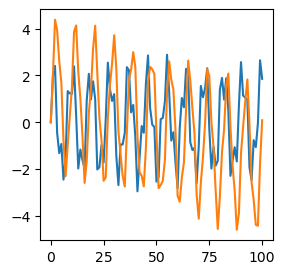

In [154]:
# hypothetical precipitation data
precip_init = 0
precip_over_time = []
precip_over_time.append(precip_init)
def precip(t):
    for i in range(t):
        precip_amt = np.sin(2*i)+2*np.cos(0.7*i)-0.03
        precip_over_time.append(precip_amt)
    return precip_over_time

def precip_intensity(t):
    precip(t)
    intensity_sum = [0]*(len(precip_over_time))
    for i in range(len(precip_over_time)):
        intensity_sum[i] = intensity_sum[i-1] + precip_over_time[i]
    return intensity_sum

precip_int = precip_intensity(m)
print(precip_int[89])
print(nat_temp[89]+GHG_temp[89])
print(precip_over_time)
print(min(precip_over_time))
plt.plot(precip_over_time)

#print(precip_int)
#print(min(precip_int))
plt.plot(precip_int)


In [94]:
##### turning lists into matrices
## GHG Temperature Anomaly Contribution 
GHG_matrix_over_time = np.zeros((n,n,m))
for t in range(m):
    for i in range(n):
        for j in range(n):
            GHG_matrix_over_time[i,j,t] = GHG_temp[t]
            
#print(GHG_matrix_over_time)

## Natural Temperature Anomaly Contribution
nat_matrix_over_time = np.zeros((n,n,m))
for t in range(m):
    for i in range(n):
        for j in range(n):
            nat_matrix_over_time[i,j,t] = nat_temp[t]

## Precipitation Intensity
precip_matrix_over_time = np.zeros((n,n,m))
for t in range(m):
    for i in range(n):
        for j in range(n):
            precip_matrix_over_time[i,j,t] = precip_int[t]
            
#print(precip_matrix_over_time[0,0,2])

In [95]:
def what_is(x,y):  ##inquires about the colour (nature) of a cell in the model grid
    for k,v in geography.items():
        if np.all(clim_model[x,y]==np.array(v)):
            whatis=k
    return whatis

print(what_is(2,2))
print(what_is(1,2))
print(what_is(2,0))
print(what_is(0,0))

################################# CHANGES MADE FROM HERE

def what_is_general(which_model,x,y):  ##inquires about the colour (nature) of a cell in the model grid
    for k,v in geography.items():
        if np.all(which_model[x,y]==np.array(v)):
            whatis=k
    return whatis

land
land
land
land



 time 0


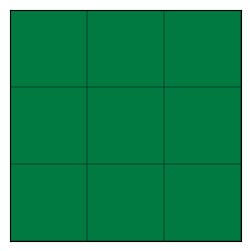

land




time 1


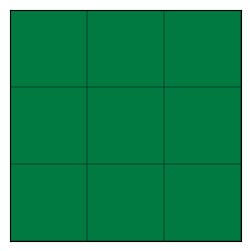

land




time 2


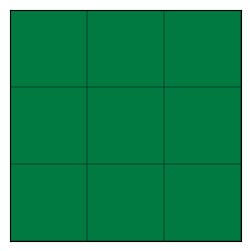

land






In [224]:
clim_model=np.array(grid_colours)  ## initializes the model to all land
model_over_time=[]
climm_model=clim_model.copy()
model_over_time.append(climm_model)
time_burned = np.zeros((n,n))

m=100
for t in range(m):
    for i in range(n):
        for j in range(n):
            g=what_is_general(climm_model,i,j)
            #print(g)
            #print("YEAR",t,"  ",precip_matrix_over_time[i,j,t],GHG_matrix_over_time[i,j,t]+nat_matrix_over_time[i,j,t])           
            if g=='land':
                if precip_matrix_over_time[i,j,t] < -2.3 and \
                       GHG_matrix_over_time[i,j,t]+nat_matrix_over_time[i,j,t] > 0.85 and random.randint(0,100)>90:  
                    clim_model[i,j] = destroyedland
                else:
                    clim_model[i,j] = land  # testing
            elif g=='destroyedland':
                time_burned[i,j] = time_burned[i,j] + 1
                if time_burned[i,j] == recovery:
                    clim_model[i,j]= land
                else:
                    clim_model[i,j]=destroyedland
    climm_model=clim_model.copy()
    model_over_time.append(climm_model)

print('\n time 0')
plot_grid(model_over_time[0])
print(what_is_general(model_over_time[0],1,2))
print(''); print('');print(''); print('')

print('time 1')
plot_grid(model_over_time[1])
print(what_is_general(model_over_time[1],1,2))          
print(''); print('');print(''); print('')   

print('time 2')
plot_grid(model_over_time[2])
print(what_is_general(model_over_time[2],1,2))
print(''); print('');print(''); print('')



time 88


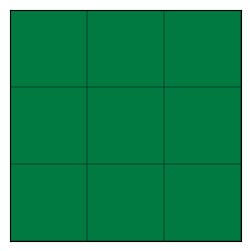

land




time 89


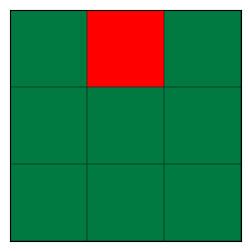

land




time 90


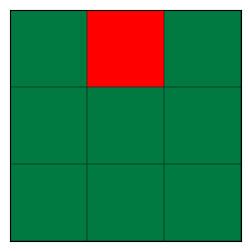

land




time 91


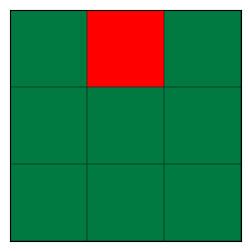

land




time 92


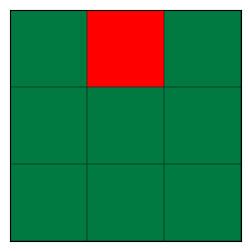

land




time 93


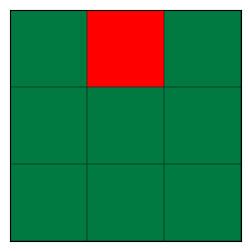

land




time 94


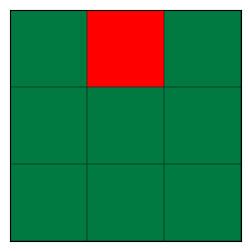

land




time 95


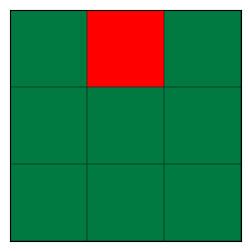

land




time 96


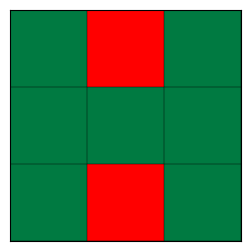

land




time 97


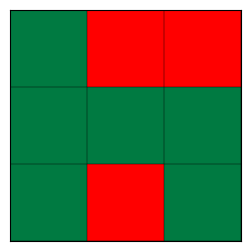

land




time 98


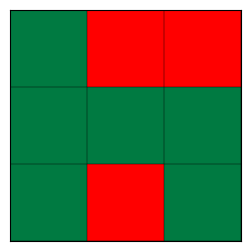

land




time 99


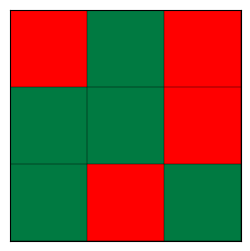

destroyedland






In [223]:
check_time=88
print('time',check_time)
plot_grid(model_over_time[check_time])
print(what_is_general(model_over_time[check_time],1,2))
print(''); print('');print(''); print('')

check_time=89
print('time',check_time)
plot_grid(model_over_time[check_time])
print(what_is_general(model_over_time[check_time],1,2))
print(''); print('');print(''); print('')

check_time=90
print('time',check_time)
plot_grid(model_over_time[check_time])
print(what_is_general(model_over_time[check_time],1,2))
print(''); print('');print(''); print('')

check_time=91
print('time',check_time)
plot_grid(model_over_time[check_time])
print(what_is_general(model_over_time[check_time],1,2))
print(''); print('');print(''); print('')

check_time=92
print('time',check_time)
plot_grid(model_over_time[check_time])
print(what_is_general(model_over_time[check_time],1,2))
print(''); print('');print(''); print('')

check_time=93
print('time',check_time)
plot_grid(model_over_time[check_time])
print(what_is_general(model_over_time[check_time],1,2))
print(''); print('');print(''); print('')

check_time=94
print('time',check_time)
plot_grid(model_over_time[check_time])
print(what_is_general(model_over_time[check_time],1,2))
print(''); print('');print(''); print('')

check_time=95
print('time',check_time)
plot_grid(model_over_time[check_time])
print(what_is_general(model_over_time[check_time],1,2))
print(''); print('');print(''); print('')

check_time=96
print('time',check_time)
plot_grid(model_over_time[check_time])
print(what_is_general(model_over_time[check_time],1,2))
print(''); print('');print(''); print('')

check_time=97
print('time',check_time)
plot_grid(model_over_time[check_time])
print(what_is_general(model_over_time[check_time],1,2))
print(''); print('');print(''); print('')

check_time=98
print('time',check_time)
plot_grid(model_over_time[check_time])
print(what_is_general(model_over_time[check_time],1,2))
print(''); print('');print(''); print('')

check_time=99
print('time',check_time)
plot_grid(model_over_time[check_time])
print(what_is_general(model_over_time[check_time],1,2))
print(''); print('');print(''); print('')

In [98]:
################### extras

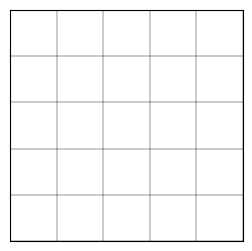

In [99]:
##########  plotting
fig, ax = plt.subplots()
#ax.imshow(model_over_time[99])

# Set ticks and labels (not really needed)
#ax.set_xticks(np.arange(0.5, n, 1))
#ax.set_yticks(np.arange(0.5, n, 1))
ax.tick_params(bottom=False, top=False, left=False, right=False)
ax.set_xticklabels([])
ax.set_yticklabels([])
# add grid lines  
ax.grid(color='black', linewidth=0.3)
plt.show() 

In [100]:
print(model_over_time[0])

[[[0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]]

 [[0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]]

 [[0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]]]


In [101]:
print(model_over_time[1])

[[[0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]]

 [[0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]]

 [[0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]]]


In [102]:
print(model_over_time[2])

[[[0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]]

 [[0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]]

 [[0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]]]


In [103]:
print(model_over_time[96])

[[[0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]]

 [[0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]]

 [[0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]]]


In [104]:
print(model_over_time[97])

[[[0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]]

 [[0.         0.47843137 0.25490196]
  [1.         0.         0.        ]
  [1.         0.         0.        ]]

 [[0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]
  [0.         0.47843137 0.25490196]]]


In [105]:
A=np.array([[1,2],[3,4]])
B=A
print(A,'\n\n',B)

print('')

A[1,0]=999
print(A,'\n\n',B)

[[1 2]
 [3 4]] 

 [[1 2]
 [3 4]]

[[  1   2]
 [999   4]] 

 [[  1   2]
 [999   4]]


In [106]:
A=np.array([[1,2],[3,4]])
B=A.copy()
print(A,'\n\n',B)

print('')

A[1,0]=999
print(A,'\n\n',B)

[[1 2]
 [3 4]] 

 [[1 2]
 [3 4]]

[[  1   2]
 [999   4]] 

 [[1 2]
 [3 4]]
